# Import Section & Dataset

In [1]:
# !pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# fetch dataset
wine = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

In [3]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [4]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

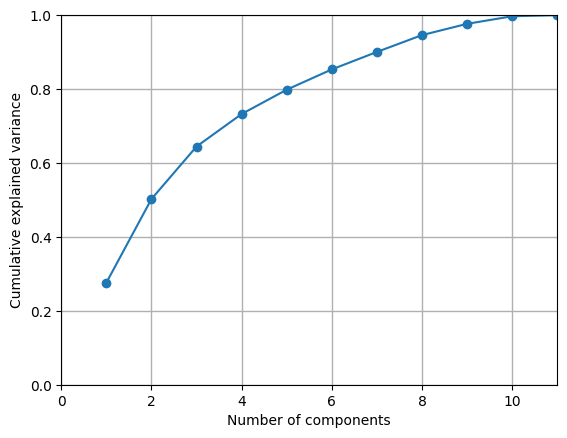

In [6]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         linestyle='-', marker='o')
plt.grid(linestyle='-', linewidth=1)
plt.xlim([0,11])
plt.ylim([0,1])
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

Above graph show how much information will be retain with n Number of Component (For example 1 Component will retain 50% of original information)

# PCA From Scratch

First we find covariance manually or using numpy library

In [7]:
mean_vec = np.mean(X_train, axis=0)
cov_mat = (X_train - mean_vec).T.dot((X_train - mean_vec)) / (X_train.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)
# print('NumPy covariance matrix: \n%s' %np.cov(X_train.T)) # Using numpy built-in to find covariance

Covariance matrix 
[[ 1.00019246e+00  2.20768677e-01  3.31819842e-01 -1.11126792e-01
   2.94397356e-01 -2.89173560e-01 -3.37872629e-01  4.51578533e-01
  -2.49218893e-01  2.99826509e-01 -8.70857105e-02]
 [ 2.20768677e-01  1.00019246e+00 -3.69985292e-01 -1.85237964e-01
   3.78525054e-01 -3.59094519e-01 -4.10622496e-01  2.74701972e-01
   2.55069740e-01  2.29155434e-01 -3.87649657e-02]
 [ 3.31819842e-01 -3.69985292e-01  1.00019246e+00  1.40327658e-01
   4.72585493e-02  1.32026909e-01  1.84974484e-01  1.01625379e-01
  -3.27753425e-01  6.43927266e-02 -1.03053044e-02]
 [-1.11126792e-01 -1.85237964e-01  1.40327658e-01  1.00019246e+00
  -1.25509077e-01  4.02036938e-01  4.92157602e-01  5.62873810e-01
  -2.65554169e-01 -1.86777350e-01 -3.65660721e-01]
 [ 2.94397356e-01  3.78525054e-01  4.72585493e-02 -1.25509077e-01
   1.00019246e+00 -2.02476190e-01 -2.81903992e-01  3.58069280e-01
   3.85424024e-02  4.03802289e-01 -2.50248520e-01]
 [-2.89173560e-01 -3.59094519e-01  1.32026909e-01  4.02036938e-01


Visualization of Covariance Matrix

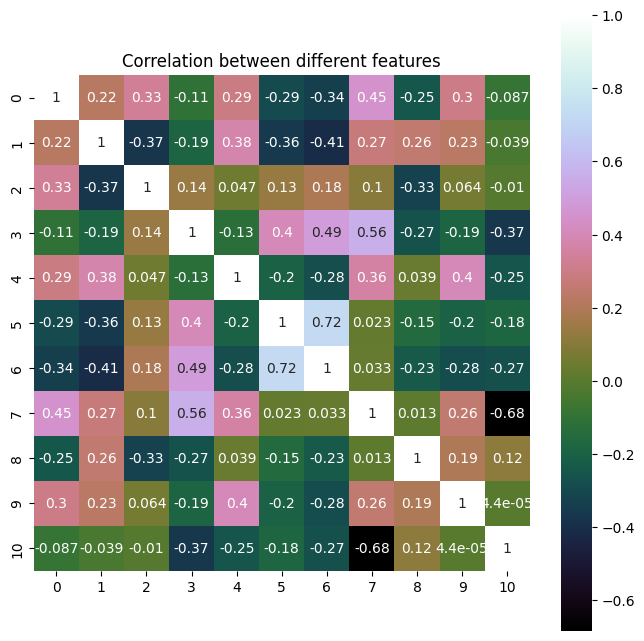

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')
plt.show()

Then we will calculate eigen value and eigen vector with built-in numpy function

In [9]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.2443545   0.33062133 -0.43111007 -0.33087071 -0.17782952 -0.28483532
   0.34044957  0.15485058  0.17529538  0.34396875  0.36601504]
 [ 0.37670505  0.12089292  0.31210914 -0.0839253  -0.22049429  0.15671361
  -0.4862132  -0.16253674  0.49027907  0.38262108 -0.12748266]
 [-0.14113573  0.18766334 -0.59444432  0.00161509  0.26391015  0.23425413
  -0.40020276  0.16766189 -0.20257358  0.321056   -0.36686124]
 [-0.34205543  0.33778128  0.159044   -0.45541379 -0.1695389  -0.0072009
   0.1078311   0.33407079  0.26567355 -0.31098923 -0.46570625]
 [ 0.29149583  0.31265668  0.01516711 -0.04627194  0.25394745 -0.20012773
   0.30439074 -0.61309035 -0.14911674 -0.01855949 -0.46824211]
 [-0.43505064  0.07064598  0.11784588 -0.00087501  0.35052152  0.47809834
   0.37610308 -0.21506891  0.33057996  0.33663376  0.17347838]
 [-0.48760413  0.08770501  0.10239433  0.06503946  0.20854572 -0.71118932
  -0.32252753 -0.15636852  0.14516366  0.16929793  0.1111051 ]
 [ 0.04384248  0.58436182  0

After that we will make pair of eigen vector and eigen value sorted by eigen value

In [10]:
eigen_pair = [[eig_vals[i] ,eig_vecs[:,i]] for i in range(len(eig_vals))]

In [11]:
eigen_pair.sort(key=lambda x : x[0], reverse=True)

In [12]:
eigen_pair

[[np.float64(3.0366437658031455),
  array([ 0.2443545 ,  0.37670505, -0.14113573, -0.34205543,  0.29149583,
         -0.43505064, -0.48760413,  0.04384248,  0.21321871,  0.29975176,
          0.11059299])],
 [np.float64(2.4916076325976744),
  array([ 0.33062133,  0.12089292,  0.18766334,  0.33778128,  0.31265668,
          0.07064598,  0.08770501,  0.58436182, -0.15505733,  0.18939323,
         -0.4636078 ])],
 [np.float64(1.5630434085710525),
  array([-0.43111007,  0.31210914, -0.59444432,  0.159044  ,  0.01516711,
          0.11784588,  0.10239433,  0.17611652,  0.45669635, -0.0700649 ,
         -0.26262707])],
 [np.float64(0.967342935213499),
  array([-0.17782952, -0.22049429,  0.26391015, -0.1695389 ,  0.25394745,
          0.35052152,  0.20854572, -0.07383349,  0.41723609,  0.63475752,
          0.08981376])],
 [np.float64(0.7243366489230026),
  array([ 0.15485058, -0.16253674,  0.16766189,  0.33407079, -0.61309035,
         -0.21506891, -0.15636852,  0.30442414,  0.47362516,  0.1

Calculate importance of vector

In [13]:
total = sum(eig_vals)
for i, val in enumerate(eigen_pair):
  print(f"Eigen Vector {i} : {(val[0]/total)*100}%")

Eigen Vector 0 : 27.600540534072344%
Eigen Vector 1 : 22.646620006258%
Eigen Vector 2 : 14.206751361686262%
Eigen Vector 3 : 8.792334548549581%
Eigen Vector 4 : 6.583611572767365%
Eigen Vector 5 : 5.484375148838152%
Eigen Vector 6 : 4.727590037611554%
Eigen Vector 7 : 4.552192222096362%
Eigen Vector 8 : 3.0500830490940145%
Eigen Vector 9 : 2.048873108191817%
Eigen Vector 10 : 0.30702841083453564%


Finally we select how many Component we want (For example we want 6 component left from the original)

In [14]:
def extractComponent(n_components, eigen_pair):
  total = np.sum([pair[0] for pair in eigen_pair])
  information_retain = np.sum([eigen_pair[i][0] for i in range(n_components)])
  print(f"{(information_retain / total) * 100:.2f}% of all information will be retain")
  len_max = len(eigen_pair[0][1])
  w = np.hstack(tuple([eigen_pair[i][1].reshape(len_max,1) for i in range(n_components)]))
  return w
w = extractComponent(8, eigen_pair)

94.59% of all information will be retain


In [15]:
w

array([[ 0.2443545 ,  0.33062133, -0.43111007, -0.17782952,  0.15485058,
         0.17529538,  0.34396875,  0.36601504],
       [ 0.37670505,  0.12089292,  0.31210914, -0.22049429, -0.16253674,
         0.49027907,  0.38262108, -0.12748266],
       [-0.14113573,  0.18766334, -0.59444432,  0.26391015,  0.16766189,
        -0.20257358,  0.321056  , -0.36686124],
       [-0.34205543,  0.33778128,  0.159044  , -0.1695389 ,  0.33407079,
         0.26567355, -0.31098923, -0.46570625],
       [ 0.29149583,  0.31265668,  0.01516711,  0.25394745, -0.61309035,
        -0.14911674, -0.01855949, -0.46824211],
       [-0.43505064,  0.07064598,  0.11784588,  0.35052152, -0.21506891,
         0.33057996,  0.33663376,  0.17347838],
       [-0.48760413,  0.08770501,  0.10239433,  0.20854572, -0.15636852,
         0.14516366,  0.16929793,  0.1111051 ],
       [ 0.04384248,  0.58436182,  0.17611652, -0.07383349,  0.30442414,
        -0.01194284,  0.0353995 , -0.00630398],
       [ 0.21321871, -0.15505733

After that we can apply matrix w to X_std to reduced dimension of all feature

In [16]:
X_PCA_Scratch = X_train.dot(w)
X_PCA_Scratch

array([[-1.41124626, -0.56091442, -0.02940485, ..., -0.30928183,
         0.15343922, -0.23850244],
       [ 2.39061574, -0.51213698, -1.96136284, ..., -0.3411601 ,
        -0.21063189, -1.1604305 ],
       [ 2.64855663, -1.10994882,  1.78412056, ...,  1.59545338,
         0.71810452,  0.21501937],
       ...,
       [-1.06545328,  0.66104602,  1.50989241, ..., -0.04174814,
         0.70189057, -0.229286  ],
       [-2.05391365,  0.79029077, -0.1384217 , ..., -0.43087233,
         0.49692392, -0.22761791],
       [ 2.29884543,  0.40367349,  2.58407161, ..., -0.34506941,
         0.5682948 ,  0.32398949]])

# PCA From SciKit Learn API

In [17]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=6)
X_PCA_Scikit = sklearn_pca.fit_transform(X_train)

In [18]:
X_PCA_Scikit

array([[ 1.41124626, -0.56091442,  0.02940485, -0.54418653, -0.23237356,
        -0.30928183],
       [-2.39061574, -0.51213698,  1.96136284,  0.38088506, -0.50161755,
        -0.3411601 ],
       [-2.64855663, -1.10994882, -1.78412056, -0.43646606,  0.15803717,
         1.59545338],
       ...,
       [ 1.06545328,  0.66104602, -1.50989241,  0.70734618,  2.07057489,
        -0.04174814],
       [ 2.05391365,  0.79029077,  0.1384217 ,  0.5698339 ,  0.19319462,
        -0.43087233],
       [-2.29884543,  0.40367349, -2.58407161, -0.3712069 , -0.13622073,
        -0.34506941]])

# Uses

In [19]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
def applyrandomforest(trainX, testX, trainY, testY):
    """
    Apply Random Forest on input dataset.
    """
    start = time.process_time()
    forest = RandomForestClassifier(n_estimators=700, max_features='sqrt', max_depth=15)
    forest.fit(trainX, trainY)
    print("Time Elapsed: %s secs" % (time.process_time() - start))
    prediction = forest.predict(testX)
    print("Classification Report after applying Random Forest: ")
    print("----------------------------------------------------")
    print(classification_report(testY, prediction))

In [20]:
import warnings
warnings.filterwarnings("ignore")
X_PCA_Scikit_test = sklearn_pca.transform(X_test)
# Normal Dataset
applyrandomforest(X_train, X_test, y_train, y_test)
# PCA Dataset
applyrandomforest(X_PCA_Scikit, X_PCA_Scikit_test, y_train, y_test)

Time Elapsed: 5.78125 secs
Classification Report after applying Random Forest: 
----------------------------------------------------
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.80      0.09      0.17        43
           5       0.67      0.72      0.70       402
           6       0.66      0.77      0.71       597
           7       0.73      0.54      0.62       215
           8       0.92      0.33      0.49        36
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1300
   macro avg       0.54      0.35      0.38      1300
weighted avg       0.68      0.68      0.66      1300

Time Elapsed: 7.34375 secs
Classification Report after applying Random Forest: 
----------------------------------------------------
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.83     

PCA is often applied to

1. Reduce Computing Time
2. Generalize Data (Reduce Overfitting)

# Homework

จาก Mushroom Dataset ที่กำหนด จงใช้ PCA เพื่อลดจำนวน features ของใน dataset นี้ลง และบันทึกผลการทดลองปรับจำนวน features ลดลงที่ต่างกันมาอย่างน้อย 5 จำนวน

สรุปผลการทดลองปรับ Mushroom Dataset
 1. นี้มีจำนวน features ทั้งหมดเท่าใด
 2. ลดจำนวน features เป็น components จำนวนทั้งหมดเท่าใดจึงจะทำให้มีค่า accuracy ลดลงไม่ต่ำเกินกว่า 5%, 10% และ 15% จากค่า base accuracy และได้ค่า accuracy ใหม่เป็นเท่าใด
 3. หากใช้จำนวน components = 5 จะมีค่า explained variance ทั้งหมดเป็นกี่เปอร์เซ็นต์ของ dataset นี้
 4. หากลดลงเป็นจำนวน components = 4 จะสูญเสียข้อมูลกี่เปอร์เซ็นต์จากที่ใช้จำนวน components = 5

``` python
# /// homework code for ML-based practice of PCA ///
mushroom = pd.read_csv('https://archive.ics.uci.edu/static/public/73/data.csv').dropna()
mushroom.head()

# poisonous column is the label (edible=e, poisonous=p)
pd.unique(mushroom['poisonous'])

X = mushroom.drop(columns='poisonous')
y = mushroom['poisonous']
pd.unique(y)

# ...Your code transform to less dimensional data...
# ...
# ...
# ...

# Observing PCA variance ratio effects
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)

def plot_variance_ratio(pca):
  plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
          np.cumsum(pca.explained_variance_ratio_),
          linestyle='-', marker='o')
  plt.grid(linestyle='-', linewidth=1)
  plt.xlim([0,21])
  plt.ylim([0,1])
  plt.xlabel('Number of components')
  plt.ylabel('Cumulative explained variance')
  plt.show()

plot_variance_ratio(pca)

pca_variance_ratio = pca.explained_variance_ratio_
print(pca_variance_ratio)
print('Number of components:', len(pca_variance_ratio))

# ... Your code to predict through logistic regression ...
# ...
# ...
# ...



  ```

1. นี้มีจำนวน features ทั้งหมดเท่าใด

In [21]:
from sklearn.preprocessing import LabelEncoder

mushroom = pd.read_csv('https://archive.ics.uci.edu/static/public/73/data.csv').dropna()


# encode all features
for cur_col in mushroom.columns:
    cur_le = LabelEncoder()
    mushroom[cur_col] = cur_le.fit_transform(mushroom[cur_col])

# encode labels
mushroom['poisonous'] = LabelEncoder().fit_transform(mushroom['poisonous'])

X = mushroom.drop(columns='poisonous')
y = mushroom['poisonous']

print("features ทั้งหมด: %s" % (list(X.columns)))

len_X = len(list(X.columns))
print("จํานวน features ทั้งหมด: %s" % (len_X))

features ทั้งหมด: ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
จํานวน features ทั้งหมด: 22


2. ลดจำนวน features เป็น components จำนวนทั้งหมดเท่าใดจึงจะทำให้มีค่า accuracy ลดลงไม่ต่ำเกินกว่า 5%, 10% และ 15% จากค่า base accuracy และได้ค่า accuracy ใหม่เป็นเท่าใด

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# find base accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
base_acc = accuracy_score(y_test, y_pred)
print(f"base accuracy: {base_acc}")


n_feature = 22

res_comp_acc = {
    "less_5%_base_acc": [], # 5% of base_acc: 0.04853852967227635
    "less_10%_base_acc": [], # 10% of base_acc: 0.0970770593445527
    "less_15%_base_acc": [] # 15% of base_acc: 0.14561558901682903
}

for i in range(1, n_feature+1):
    cur_PCA = PCA(n_components=i)
    cur_X_train_PCA = cur_PCA.fit_transform(X_train)
    cur_X_test_PCA = cur_PCA.transform(X_test)

    cur_model = LogisticRegression(random_state=0)
    cur_model.fit(cur_X_train_PCA, y_train)
    cur_y_pred = cur_model.predict(cur_X_test_PCA)
    cur_acc = accuracy_score(y_test, cur_y_pred)
    
    # 15% of base_acc: 0.14561558901682903
    if(base_acc - cur_acc >= 0.15 * base_acc):
        res_comp_acc["less_15%_base_acc"].append((i, cur_acc))
    
    # 10% of base_acc: 0.0970770593445527
    elif(base_acc - cur_acc >= 0.1 * base_acc):
        res_comp_acc["less_10%_base_acc"].append((i, cur_acc))
    
    # 5% of base_acc: 0.04853852967227635
    elif(base_acc - cur_acc >= 0.05 * base_acc):
        res_comp_acc["less_5%_base_acc"].append((i, cur_acc))

print("\nการลดจํานวน feature เป็น component แล้วได้ค่า accuracy ลดลงไม่ตํ่ากว่า 5% จาก based accuracy มีดังนี้")
for cur_component, cur_acc in res_comp_acc["less_5%_base_acc"]:
    print(f"n_component: {cur_component} | accuracy: {cur_acc}")

print("\nการลดจํานวน feature เป็น component แล้วได้ค่า accuracy ลดลงไม่ตํ่ากว่า 10% จาก based accuracy มีดังนี้")
for cur_component, cur_acc in res_comp_acc["less_10%_base_acc"]:
    print(f"n_component: {cur_component} | accuracy: {cur_acc}")

print("\nการลดจํานวน feature เป็น component แล้วได้ค่า accuracy ลดลงไม่ตํ่ากว่า 15% จาก based accuracy มีดังนี้")
for cur_component, cur_acc in res_comp_acc["less_15%_base_acc"]:
    print(f"n_component: {cur_component} | accuracy: {cur_acc}")

base accuracy: 0.970770593445527

การลดจํานวน feature เป็น component แล้วได้ค่า accuracy ลดลงไม่ตํ่ากว่า 5% จาก based accuracy มีดังนี้
n_component: 14 | accuracy: 0.8742249778565102

การลดจํานวน feature เป็น component แล้วได้ค่า accuracy ลดลงไม่ตํ่ากว่า 10% จาก based accuracy มีดังนี้
n_component: 2 | accuracy: 0.8432240921169176
n_component: 5 | accuracy: 0.83348095659876
n_component: 6 | accuracy: 0.829052258635961
n_component: 7 | accuracy: 0.829052258635961
n_component: 8 | accuracy: 0.8387953941541186
n_component: 9 | accuracy: 0.8387953941541186
n_component: 10 | accuracy: 0.8609388839681134
n_component: 11 | accuracy: 0.8556244464127547
n_component: 12 | accuracy: 0.8724534986713907
n_component: 13 | accuracy: 0.8715677590788308

การลดจํานวน feature เป็น component แล้วได้ค่า accuracy ลดลงไม่ตํ่ากว่า 15% จาก based accuracy มีดังนี้
n_component: 1 | accuracy: 0.7360496014171833
n_component: 3 | accuracy: 0.8139946855624446
n_component: 4 | accuracy: 0.8201948627103631


 3. หากใช้จำนวน components = 5 จะมีค่า explained variance ทั้งหมดเป็นกี่เปอร์เซ็นต์ของ dataset นี้

In [23]:
n_component = 5
pca_n_5 = PCA(n_component)
pca_n_5.fit(X_train)
print(f"หากใช้จำนวน components = 5 จะมีค่า explained variance ทั้งหมดเป็น {sum(pca_n_5.explained_variance_ratio_*100):.2f} % ของ dataset นี้")

หากใช้จำนวน components = 5 จะมีค่า explained variance ทั้งหมดเป็น 70.73 % ของ dataset นี้


4. หากลดลงเป็นจำนวน components = 4 จะสูญเสียข้อมูลกี่เปอร์เซ็นต์จากที่ใช้จำนวน components = 5

In [24]:
pca_n_4 = PCA(4)
pca_n_4.fit(X_train)

sum_pca_n_5_var_ratio = sum(pca_n_5.explained_variance_ratio_)
sum_pca_n_4_var_ratio = sum(pca_n_4.explained_variance_ratio_)
res = (sum_pca_n_5_var_ratio- sum_pca_n_4_var_ratio) * 100 / sum_pca_n_5_var_ratio
print(f"หากลดลงเป็นจำนวน components = 4 จะสูญเสียข้อมูล {res:.2f}% จากที่ใช้จำนวน components = 5")


หากลดลงเป็นจำนวน components = 4 จะสูญเสียข้อมูล 11.06% จากที่ใช้จำนวน components = 5
